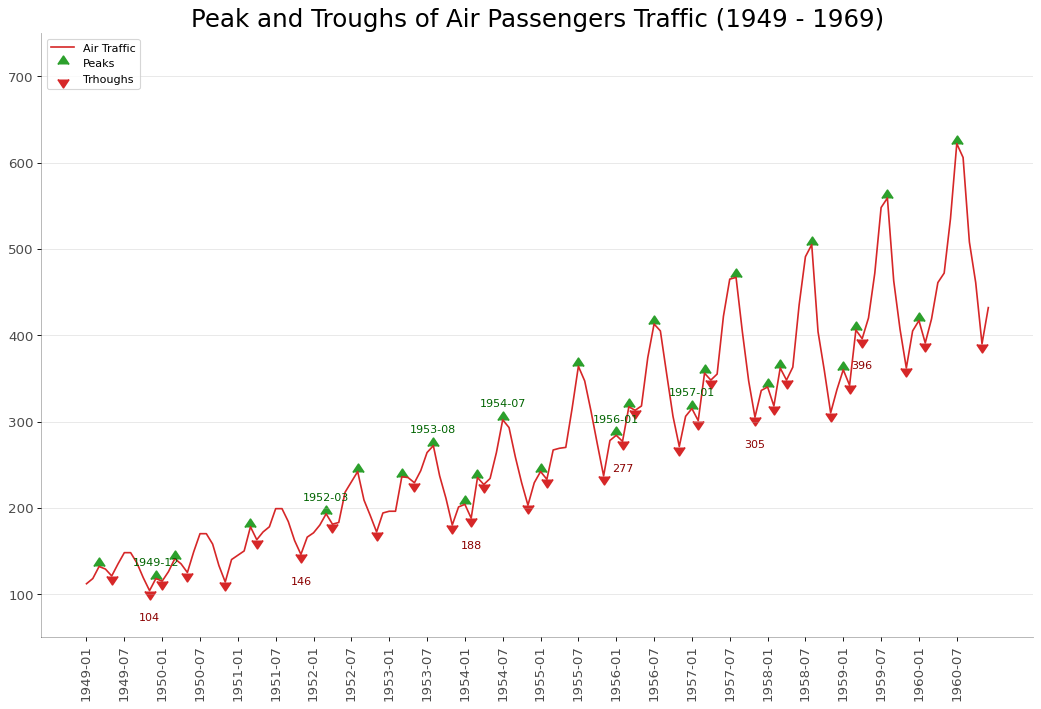

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#load Dataset
df = pd.read_csv('AirPassengers.csv')

#Prepare Data
# datelist = df['date'].values
# trafficlist = df['traffic'].values
datelist = df['date'].tolist()
trafficlist = df['traffic'].tolist()


data = df['traffic'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0]+1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0]+1

#Draw Plot
plt.figure(figsize=(16,10), dpi=80)
plt.plot(datelist,trafficlist, color='tab:red', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.traffic[peak_locations], 
            marker=mpl.markers.CARETUPBASE,
            color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.traffic[trough_locations], 
             marker=mpl.markers.CARETDOWNBASE,
             color='tab:red', s=100, label='Trhoughs')

#Annotations
for t,p in zip(trough_locations[1::5], peak_locations[1::3]):
    plt.text(df.date[p], df.traffic[p]+15, df.date[p],horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.traffic[t]-35, df.traffic[t],horizontalalignment='center', color='darkred')
    
    
# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()